## Cookie cats

In [ ]:
data = pd.read_csv("./cookie_cats.csv")
data

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [ ]:
data_no_max = data[data.sum_gamerounds < data.sum_gamerounds.max()]

In [ ]:
data_no_max.groupby("version").sum_gamerounds.agg(["count", "median", "max", "mean", "var", "std", cv])

,count,median,max,mean,var,std,cv
version,,,,,,,
gate_30,44699,17.0,2961,51.342111,10415.753288,102.057598,198.779514
gate_40,45489,16.0,2640,51.298776,10669.736422,103.294416,201.358444


In [ ]:
data_no_max.groupby("version").retention_7.agg(["count", "median", "max", "mean", "var", "std", cv])

,count,median,max,mean,var,std,cv
version,,,,,,,
gate_30,44699,0.0,True,0.190183,0.154017,0.392450,206.353642
gate_40,45489,0.0,True,0.182000,0.148879,0.385849,212.004787


In [ ]:
len(data_no_max[data_no_max.version == 'gate_30'])

44699

### MDE

In [ ]:
np.sqrt(51)

7.14142842854285

In [ ]:
power=0.8
alpha=0.05
MDE = 0.01
gate_30 = data_no_max[data_no_max.version == 'gate_30']
baseline_rate = round(gate_30.sum_gamerounds.mean() / gate_30.sum_gamerounds.max(), 2)
effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + MDE)
baseline_rate, effect_size

(0.02, -0.06437191206463305)

In [ ]:
n = np.ceil(sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha, ratio=1))
n

3789.0

In [ ]:
power=0.8
alpha=0.05
MDE = 0.05
baseline_rate = round(data_no_max[data_no_max.version == 'gate_30'].retention_7.mean(), 2)
effect_size = sms.proportion_effectsize(baseline_rate, baseline_rate + MDE)

In [ ]:
baseline_rate, effect_size

(0.19, -0.1218917525064277)

In [ ]:
n = np.ceil(sms.NormalIndPower().solve_power(effect_size, power=power, alpha=alpha, ratio=1))
n

1057.0

In [ ]:
from tqdm import tqdm

In [ ]:
len_a = len(data_no_max[data_no_max.version == 'gate_30'])
len_b = len(data_no_max[data_no_max.version == 'gate_40'])
min_c = min(len_a, len_b)
a_size = 0
sizes = []
pvals = []
step = 100
for i in tqdm(range(min_c // step)):
    a_size = min(a_size + step, len_a)
    b_size = min(a_size, len_b)
    a_sample = data_no_max[data_no_max.version == 'gate_30'][:a_size]
    b_sample = data_no_max[data_no_max.version == 'gate_40'][:b_size]
    sizes.append(a_size)
    ad_succes_count = [a_sample.retention_7.sum(), b_sample.retention_7.sum()]
    pvals.append(proportions_ztest(ad_succes_count, nobs=[a_size, a_size])[1])

  0%|          | 1/446 [00:00<02:37,  2.83it/s]

100%|██████████| 446/446 [00:21<00:00, 20.74it/s]


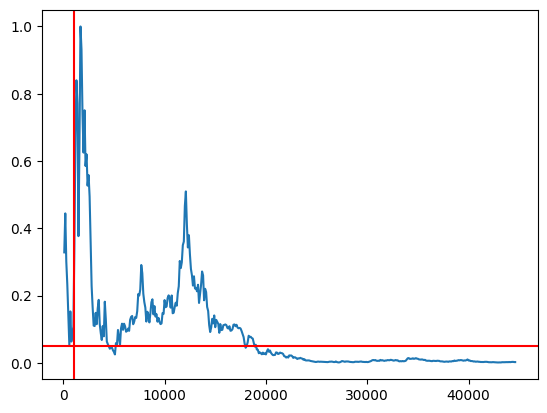

In [ ]:
plt.plot(sizes, pvals)
plt.axvline(x=n, color='r')
plt.axhline(y=0.05, color='r')
plt.show()